Vamos a probar con github  
 * previamente a la extraccion siempre chequeamos si existe algun impedimento de la pagina, chequeamos que no exista algun archivo /robot.txt (github.com/robot.txt)  
* *importante: la version que se utiliza en este tutorial es selenium==4.21.0*

In [1]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By

In [2]:
driver = webdriver.Firefox()
driver.get("https://github.com/collections/machine-learning")

**Estos serian los proyectos que estariamos buscando extraer**  
*(si en algun momento se cerrara este grupo de coleccion siempre se puede explorar otros proyectos en https://github.com/explore)*

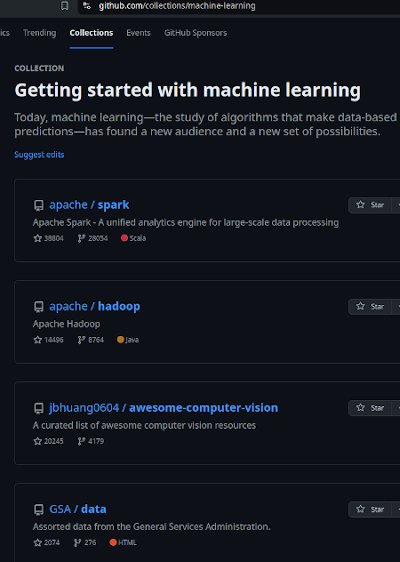  

vemos que los elementos son etiquetas h1 que tienen la clase h3 y lh-condensed

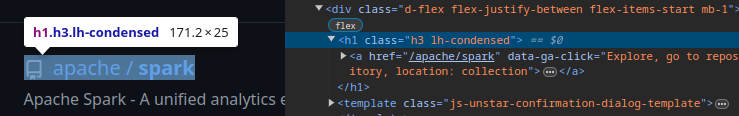

In [3]:
elementos = driver.find_elements(By.TAG_NAME, "h1")
for e in elementos:
    print(e.text)




Getting started with machine learning
apache / spark
apache / hadoop
jbhuang0604 / awesome-computer-vision
GSA / data
GoogleTrends / data
nationalparkservice / data
fivethirtyeight / data
beamandrew / medical-data
src-d / awesome-machine-learning-on-source-code
igrigorik / decisiontree
keon / awesome-nlp
openai / gym
aikorea / awesome-rl
umutisik / Eigentechno
jpmckinney / tf-idf-similarity
scikit-learn-contrib / lightning
gwding / draw_convnet
scikit-learn / scikit-learn
tensorflow / tensorflow
activeloopai / deeplake


**vamos a ser mas precisos en la busqueda y solo vamos a seleccionar los h1 con class=h3 lh-condensed**

In [4]:
elementos = driver.find_elements(By.XPATH, "//h1[@class='h3 lh-condensed']")

for e in elementos:
    print(e.text)

apache / spark
apache / hadoop
jbhuang0604 / awesome-computer-vision
GSA / data
GoogleTrends / data
nationalparkservice / data
fivethirtyeight / data
beamandrew / medical-data
src-d / awesome-machine-learning-on-source-code
igrigorik / decisiontree
keon / awesome-nlp
openai / gym
aikorea / awesome-rl
umutisik / Eigentechno
jpmckinney / tf-idf-similarity
scikit-learn-contrib / lightning
gwding / draw_convnet
scikit-learn / scikit-learn
tensorflow / tensorflow
activeloopai / deeplake


Ahora que ya tenemos bien filtrada la busqueda vamos a copiar las url a un diccionario

In [5]:
diccionario = {}
for e in elementos:
    nombre_proyecto = e.text
    url_proyecto = e.find_elements(By.TAG_NAME, "a")[0].get_attribute('href')
    diccionario[nombre_proyecto] = url_proyecto

driver.quit()

In [6]:
diccionario

{'apache / spark': 'https://github.com/apache/spark',
 'apache / hadoop': 'https://github.com/apache/hadoop',
 'jbhuang0604 / awesome-computer-vision': 'https://github.com/jbhuang0604/awesome-computer-vision',
 'GSA / data': 'https://github.com/GSA/data',
 'GoogleTrends / data': 'https://github.com/GoogleTrends/data',
 'nationalparkservice / data': 'https://github.com/nationalparkservice/data',
 'fivethirtyeight / data': 'https://github.com/fivethirtyeight/data',
 'beamandrew / medical-data': 'https://github.com/beamandrew/medical-data',
 'src-d / awesome-machine-learning-on-source-code': 'https://github.com/src-d/awesome-machine-learning-on-source-code',
 'igrigorik / decisiontree': 'https://github.com/igrigorik/decisiontree',
 'keon / awesome-nlp': 'https://github.com/keon/awesome-nlp',
 'openai / gym': 'https://github.com/openai/gym',
 'aikorea / awesome-rl': 'https://github.com/aikorea/awesome-rl',
 'umutisik / Eigentechno': 'https://github.com/umutisik/Eigentechno',
 'jpmckinney /

In [12]:
df = pd.DataFrame.from_dict(diccionario, orient='index')
df.head()

,0
apache / spark,https://github.com/apache/spark
apache / hadoop,https://github.com/apache/hadoop
jbhuang0604 / awesome-computer-vision,https://github.com/jbhuang0604/awesome-compute...
GSA / data,https://github.com/GSA/data
GoogleTrends / data,https://github.com/GoogleTrends/data


le indicamos al DF que el indexado sera a travez de la columna nombre_proyecto

In [13]:
df['nombre_proyecto'] = df.index
df.columns = ['url_proyecto', 'nombre_proyecto']
df = df.reset_index(drop=True)
df

,url_proyecto,nombre_proyecto
0,https://github.com/apache/spark,apache / spark
1,https://github.com/apache/hadoop,apache / hadoop
2,https://github.com/jbhuang0604/awesome-compute...,jbhuang0604 / awesome-computer-vision
3,https://github.com/GSA/data,GSA / data
4,https://github.com/GoogleTrends/data,GoogleTrends / data
5,https://github.com/nationalparkservice/data,nationalparkservice / data
6,https://github.com/fivethirtyeight/data,fivethirtyeight / data
7,https://github.com/beamandrew/medical-data,beamandrew / medical-data
8,https://github.com/src-d/awesome-machine-learn...,src-d / awesome-machine-learning-on-source-code
9,https://github.com/igrigorik/decisiontree,igrigorik / decisiontree


guardamos esta lista en un csv

In [15]:
df.to_csv("lista_github-proyectos.csv")